In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from astropy.io import fits 
from astropy.table import Table 
from matplotlib.colors import LogNorm 
from astropy.utils.data import download_file

In [2]:
event_optics_temp1 = '/Users/kate/Desktop/Summer_work/kepler_data_and_notebooks/kplr_anc-eng_OpticsTemperatures1of2.fits'

In [3]:
hdul=fits.open(event_optics_temp1,  mmemmap=True)

In [4]:
table_hdu=hdul[1]
df=pd.DataFrame(table_hdu.data)
print(df.head())

            MJD                      UTC     LC      SC   PEDCRRT1   PEDCRRT2  \
0  54952.905681  2009-05-01T21:44:10.810  562.0  5320.0 -66.514564 -65.140955   
1  54952.906372  2009-05-01T21:45:10.547  562.0  5321.0 -66.514564 -65.140955   
2  54952.907064  2009-05-01T21:46:10.290  562.0  5322.0 -66.514564 -65.140955   
3  54952.907755  2009-05-01T21:47:10.060  562.0  5323.0 -66.514564 -65.140955   
4  54952.908447  2009-05-01T21:48:09.810  562.0  5324.0 -66.514564 -65.140955   

    PEDCRRT3   PEDPMAT1   PEDPMAT2   PEDPMAT3   PEDPMAT4  
0 -57.054846 -27.349498 -27.814515 -26.942541 -26.709965  
1 -57.054846 -27.349498 -27.814515 -26.942541 -26.709965  
2 -57.054846 -27.349498 -27.814515 -26.942541 -26.709965  
3 -57.054846 -27.349498 -27.814515 -26.942541 -26.709965  
4 -57.054846 -27.349498 -27.814515 -26.942541 -26.709965  


In [5]:
evt_data=Table(hdul[1].data)

In [6]:
evt_data

MJD,UTC,LC,SC,PEDCRRT1,PEDCRRT2,PEDCRRT3,PEDPMAT1,PEDPMAT2,PEDPMAT3,PEDPMAT4
float64,str23,float64,float64,float64,float64,float64,float64,float64,float64,float64
54952.905680671,2009-05-01T21:44:10.810,562.0,5320.0,-66.514564469661,-65.140954836912,-57.054845911519,-27.34949804564,-27.814514524840998,-26.942540782793998,-26.709965371627003
54952.906372068,2009-05-01T21:45:10.547,562.0,5321.0,-66.514564469661,-65.140954836912,-57.054845911519,-27.34949804564,-27.814514524840998,-26.942540782793998,-26.709965371627003
54952.907063542,2009-05-01T21:46:10.290,562.0,5322.0,-66.514564469661,-65.140954836912,-57.054845911519,-27.34949804564,-27.814514524840998,-26.942540782793998,-26.709965371627003
54952.907755324006,2009-05-01T21:47:10.060,562.0,5323.0,-66.514564469661,-65.140954836912,-57.054845911519,-27.34949804564,-27.814514524840998,-26.942540782793998,-26.709965371627003
54952.908446875,2009-05-01T21:48:09.810,562.0,5324.0,-66.514564469661,-65.140954836912,-57.054845911519,-27.34949804564,-27.814514524840998,-26.942540782793998,-26.709965371627003
54952.909138272,2009-05-01T21:49:09.547,562.0,5325.0,-66.514564469661,-65.140954836912,-57.054845911519,-27.34949804564,-27.814514524840998,-26.942540782793998,-26.709965371627003
54952.90982974599,2009-05-01T21:50:09.290,562.0,5326.0,-66.514564469661,-65.140954836912,-57.054845911519,-27.34949804564,-27.814514524840998,-26.942540782793998,-26.709965371627003
54952.910521142,2009-05-01T21:51:09.027,562.0,5327.0,-66.514564469661,-65.140954836912,-57.054845911519,-27.34949804564,-27.814514524840998,-26.942540782793998,-26.709965371627003
54952.911213079,2009-05-01T21:52:08.810,562.0,5328.0,-66.514564469661,-65.140954836912,-57.054845911519,-27.34949804564,-27.814514524840998,-26.942540782793998,-26.709965371627003


In [7]:
from astropy.timeseries import LombScargle
import datetime
from datetime import datetime

In [8]:
df['UTC']=pd.to_datetime(df['UTC'])
full_2010 = df[df['UTC'].dt.year == 2010]
time = full_2010['MJD']*86400
y1 = full_2010['PEDCRRT1']

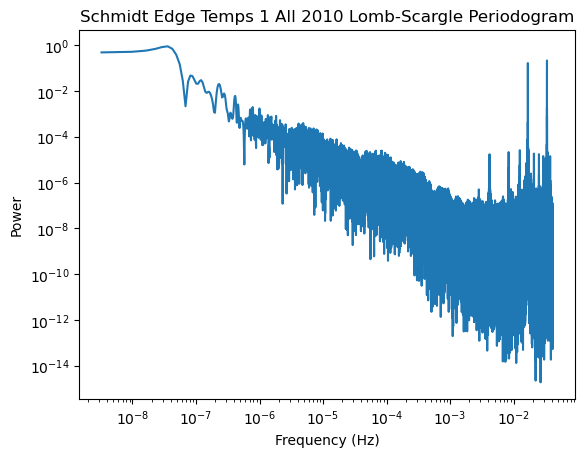

In [12]:
frequency, power = LombScargle(time, y1).autopower()
plt.plot(frequency, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Schmidt Edge Temps 1 All 2010 Lomb-Scargle Periodogram')
plt.show()

In [10]:
print(full_2010)

                  MJD                     UTC       LC        SC   PEDCRRT1  \
1711958  55197.000388 2010-01-01 00:00:33.533  12507.0  363693.0 -65.770626   
1711959  55197.001079 2010-01-01 00:01:33.263  12507.0  363694.0 -65.770626   
1711960  55197.001771 2010-01-01 00:02:33.007  12507.0  363695.0 -65.770626   
1711961  55197.002463 2010-01-01 00:03:32.777  12507.0  363696.0 -65.770626   
1711962  55197.003154 2010-01-01 00:04:32.527  12507.0  363697.0 -65.770626   
...               ...                     ...      ...       ...        ...   
2212694  55552.179055 2010-12-22 04:17:50.343  29889.0  885155.0 -66.114011   
2212695  55552.179746 2010-12-22 04:18:50.080  29889.0  885156.0 -66.114011   
2212696  55552.180438 2010-12-22 04:19:49.810  29889.0  885157.0 -66.114011   
2212697  55552.181130 2010-12-22 04:20:49.590  29889.0  885158.0 -66.114011   
2212698  55552.181821 2010-12-22 04:21:49.350  29889.0  885159.0 -66.114011   

          PEDCRRT2   PEDCRRT3   PEDPMAT1   PEDPMAT2

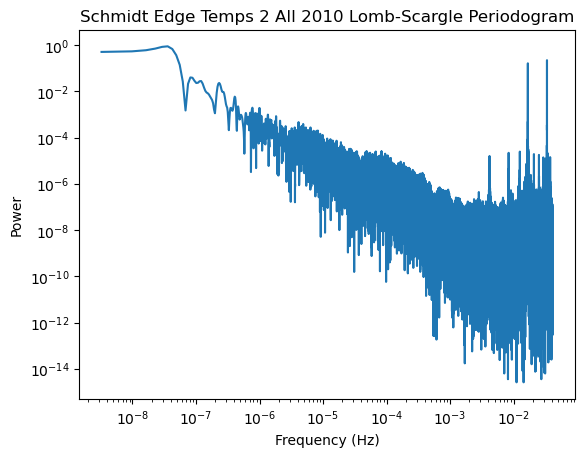

In [17]:
y2 = full_2010['PEDCRRT2']
frequency, power = LombScargle(time, y2).autopower()
plt.plot(frequency, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Schmidt Edge Temps 2 All 2010 Lomb-Scargle Periodogram')
plt.show()

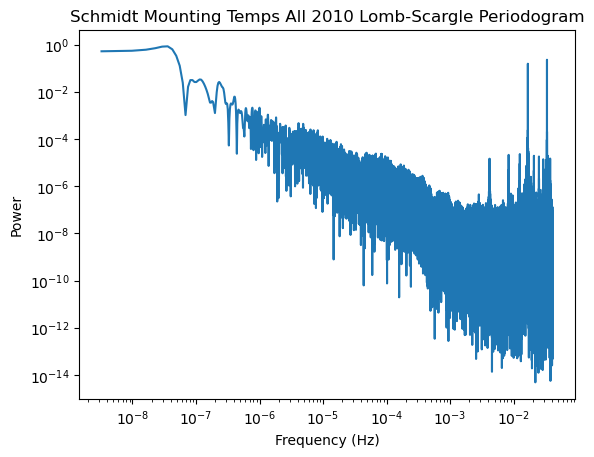

In [16]:
y3 = full_2010['PEDCRRT3']
frequency, power = LombScargle(time, y3).autopower()
plt.plot(frequency, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Schmidt Mounting Temps All 2010 Lomb-Scargle Periodogram')
plt.show()

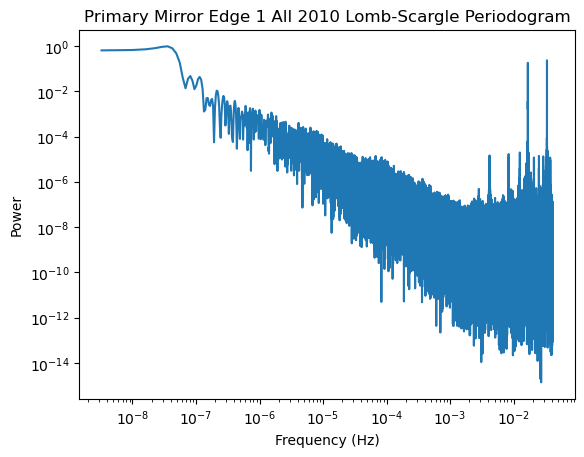

In [19]:
y4 = full_2010['PEDPMAT1']
frequency, power = LombScargle(time, y4).autopower()
plt.plot(frequency, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Primary Mirror Edge 1 All 2010 Lomb-Scargle Periodogram')
plt.show()

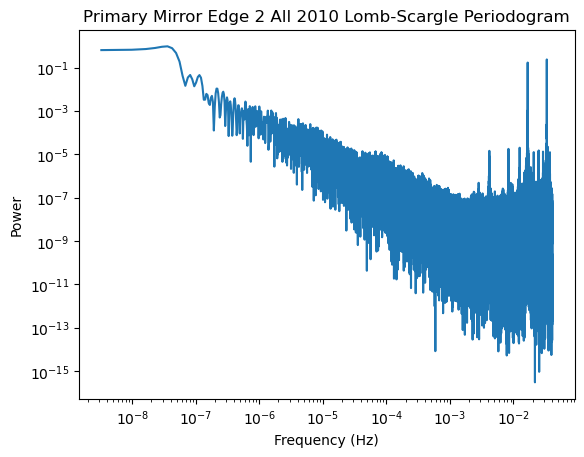

In [20]:
y5 = full_2010['PEDPMAT2']
frequency, power = LombScargle(time, y5).autopower()
plt.plot(frequency, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Primary Mirror Edge 2 All 2010 Lomb-Scargle Periodogram')
plt.show()

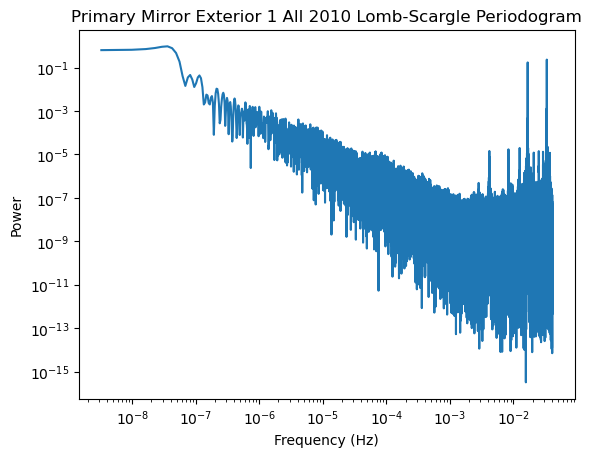

In [21]:
y6 = full_2010['PEDPMAT3']
frequency, power = LombScargle(time, y6).autopower()
plt.plot(frequency, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Primary Mirror Exterior 1 All 2010 Lomb-Scargle Periodogram')
plt.show()

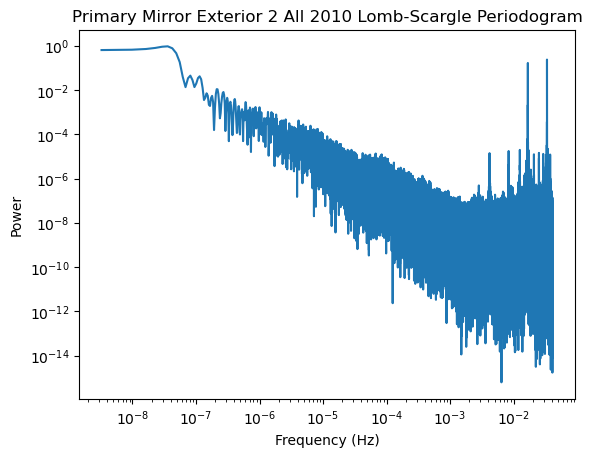

In [23]:
y7 = full_2010['PEDPMAT4']
frequency, power = LombScargle(time, y7).autopower()
plt.plot(frequency, power)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Primary Mirror Exterior 2 All 2010 Lomb-Scargle Periodogram')
plt.show()